# Data Science

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, precision_score, recall_score, confusion_matrix
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 

## Import/Export

**Import**
*   CSV: `pd.read_csv("file.csv")`
*   Excel: `pd.read_excel("file.xlsx")`
*   General delimited (text) file: `pd.read_table("file.txt", sep="\t", names=['Name', 'Age', 'Height'])`
*   JSON: `pd.read_json("file.json")`
*   SQL: `pd.read_sql("file.sql")`
*   SAS: `pd.read_sas("file.sas7bdat")`
*   Stata: `pd.read_stata("file.dta")`
*   HTML: `pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='Racial composition in 2020')` or `pd.read_html('https://en.wikipedia.org/wiki/Minnesota'[5]`

In [3]:
data = pd.read_excel("VBCData.xlsx")

**Export**
*   CSV: `DataFrame.to_csv("file.csv")`
*   Excel: `DataFrame.to_excel("file.xlsx")`
*   General delimited (text) file: `DataFrame.to_table("file.txt", sep="\t", names=['Name', 'Age', 'Height'])`
*   JSON: `DataFrame.to_json("file.json")`
*   SQL: `DataFrame.to_sql("file.sql")`
*   SAS: `DataFrame.to_sas("file.sas7bdat")`
*   Stata: `DataFrame.to_stata("file.dta")`
*   HTML: `DataFrame.to_html('https://en.wikipedia.org/wiki/Minnesota', match='Racial composition in 2020')`

## Merge/Concatenate

*  **.merge()**:  for **combining** data on common columns or indices.

`df1.merge(df2, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False)`

*  **concat()**: for **stacking** DataFrames vertically (top to bottom) or horizontally (side by side).

`pd.concat([df1,df2,df3], axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=None)`

Reference: [Pandas doc](https://pandas.pydata.org/docs/user_guide/merging.html)

In [4]:
df1 = pd.DataFrame({"A": ["A0", "A1", "A2", "A3"],"B": ["B0", "B1", "B2", "B3"],"C": ["C0", "C1", "C2", "C3"],"D": ["D0", "D1", "D2", "D3"]},index=[0, 1, 2, 3])
df2 = pd.DataFrame({"A": ["A4", "A5", "A6", "A7"],"B": ["B4", "B5", "B6", "B7"],"C": ["C4", "C5", "C6", "C7"],"D": ["D4", "D5", "D6", "D7"]},index=[4, 5, 6, 7])
df3 = pd.DataFrame({"A": ["A8", "A9", "A10", "A11"],"B": ["B8", "B9", "B10", "B11"],"C": ["C8", "C9", "C10", "C11"],"D": ["D8", "D9", "D10", "D11"]},index=[8, 9, 10, 11])
df4 = pd.DataFrame({"B": ["B2", "B3", "B6", "B7"],"D": ["D2", "D3", "D6", "D7"],"F": ["F2", "F3", "F6", "F7"]}, index=[2, 3, 6, 7])

*   **Concatenation**

In [5]:
Image(url="https://pandas.pydata.org/docs/_images/merging_concat_basic.png")

In [6]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


*   **Intersection**

In [7]:
Image(url="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png")

In [8]:
pd.concat([df1, df4], axis=1, join="inner")

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


## Preprocessing

### 1) Dropping rows/columns

In [9]:
data = data.drop(["Unnamed: 0", "Unnamed: 1"], axis=1) # COLUMNS: axis=1
data = data.drop([0,1,2], axis=0) # ROWS: axis=0 

### 2) Renaming columns

In [10]:
data = data.rename(columns={"Unnamed: 10": "Revenue"})

### 3) Formatting

In [11]:
data.dtypes

Date          datetime64[ns]
Day                   object
Breakfast              int64
Lunch                  int64
Dinner                 int64
Total                  int64
Weather               object
Notes                 object
Revenue              float64
Avg Spend            float64
dtype: object

In [12]:
#data['Lunch'] = data['Lunch'].astype(str)

**Number/String to DateTime**

In [13]:
pd.to_datetime(1490195805, unit='s', utc=True) # Timestamp('2017-03-22 15:16:45')
pd.to_datetime('2018-10-26 12:00:00', format='%Y-%m-%d %H:%M:%S', utc=True) # Timestamp('2018-10-26 12:00:00')
data["Date"] = data.Date.astype('datetime64[s]') # Converting entire col (IMP: specify precision! --> s/ms/ns)

**Extracting Day/Month/Year/Time from DateTime**

In [14]:
data['Month'] = data['Date'].dt.month # Extract 1 unit only: year / month / day / hour / minute / second
data['Time'] = data['Date'].dt.time # Extract date (date) or time (time)

**TimeDelta**: to sum/substract time (days/months/years/time) to a datetime object.

In [15]:
from datetime import timedelta

data['Date'] = data['Date'] + timedelta(days=5) # Works with hours / minutes / seconds
data['Date'] = data['Date'] + pd.DateOffset(years=2) # Works with years / months

**Change timezone**

In [16]:
import pytz
from pytz import timezone

date = pd.to_datetime('2018-10-26 12:00:00', format='%Y-%m-%d %H:%M:%S', utc=True) # Timestamp('2018-10-26 12:00:00')
date = date.tz_convert('America/New_York') # Based on location
date = date.tz_convert(timezone('EST')) # Based on timezone EST/EDT/CDT...
date = date.tz_convert(pytz.FixedOffset(120)) # Based on UTC: UTC + 2 --> 120 mins = 2 hours

### 4) Missing values

#### Identify NaN/None

In [17]:
# Identify and count number of NaNs in a col
data['Notes'].isna().sum()

7116

#### Drop NaN/None

In [18]:
# Drop only the rows where ALL values are NaN
data = data.dropna(how='all', axis=0) # ROWS: axis=0, COLS: axis=1

# Drop columns where AT LEAST ONE value is NaN
#data = data.dropna(how='any', axis=1) 

# Drop rows that contain LESS THAN 3 NON-MISSING values
data = data.dropna(thresh=3, axis=0) 

#### Replacing NaN/None

In [19]:
# Replacing with fixed/custom values
data = data.fillna(0)
data = data.fillna({'Notes': 'XXX', 'Dinner': 0, 'Weather': 'Normal'})

In [20]:
# Replacing with adjacent values
data = data.ffill() # Forward fill (replaces NaN with the PREVIOUS valid value)
data = data.bfill() # Backward fill (replaces NaN with the NEXT valid value)

In [21]:
# Replacing with dataset aggregate values (mean, median, mode)
data = data.fillna(data.mean(numeric_only=True)) # Also works with median / mode

*  **Linear interpolation**: Estimates missing values by drawing a straight line between the two nearest known data points. Good for capturing linear trends, but less accurate for complex patterns.
*  **Spline imputation (time series)**: Estimates missing values by fitting a flexible, curved line through the data points. More accurate for capturing complex trends and subtle changes than linear interpolation, but computationally more expensive.

Reference: [GeeksForGeeks](https://www.geeksforgeeks.org/how-to-deal-with-missing-values-in-a-timeseries-in-python/)

In [22]:
data["Revenue"] = data["Revenue"].interpolate(option='linear') # Also works with option='spline'

### 5) Duplicates

In [23]:
duplicates = data[data.duplicated()] # data.duplicated() returns a BOOLEAN list indicating True if the row is duplicated, thus data[data.duplicated()] is a dataframe of the duplicates only
data = data.drop(duplicates.index) # Function '.drop()' drops by row index!

## Data manipulation

### Adding/Modifying columns

In [24]:
# Add new col
def func(row):
    return 'weekend' if row in ['Saturday', 'Sunday'] else 'weekday'
data["New_Column"] = data["Day"].apply(func)
data

,Date,Day,Breakfast,Lunch,Dinner,Total,Weather,Notes,Revenue,Avg Spend,Month,Time,New_Column
3,2026-01-02,Thursday,26,154,21,201,PM Rain,0,3677.01,18.293582,12,00:00:00,weekday
4,2026-01-01,Wednesday,43,138,13,194,PM Rain,0,3239.03,16.696031,12,00:00:00,weekday
5,2025-12-31,Tuesday,28,145,0,173,Overcast,0,3142.37,18.163988,12,00:00:00,weekday
6,2025-12-30,Monday,0,0,0,0,0,Christmas,0.00,0.000000,12,00:00:00,weekday
7,2025-12-29,Sunday,62,52,0,114,PM Rain,Christmas Eves,1971.49,17.293772,12,00:00:00,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,2002-01-10,Wednesday,8,110,20,138,0,0,1320.27,9.567174,1,00:00:00,weekday
9075,2002-01-09,Tuesday,5,92,0,97,0,0,1077.91,11.112474,1,00:00:00,weekday
9076,2002-01-08,Monday,3,79,0,82,Part Sunny,Warm,840.04,10.244390,1,00:00:00,weekday
9077,2002-01-07,Sunday,55,161,29,245,0,0,2259.14,9.220980,1,00:00:00,weekend


In [25]:
# Modify existing cols
cols = ["Lunch", "Dinner", "Total"]
for c in cols:
    data[c] = data[c].apply(lambda x: x + 1)
data

,Date,Day,Breakfast,Lunch,Dinner,Total,Weather,Notes,Revenue,Avg Spend,Month,Time,New_Column
3,2026-01-02,Thursday,26,155,22,202,PM Rain,0,3677.01,18.293582,12,00:00:00,weekday
4,2026-01-01,Wednesday,43,139,14,195,PM Rain,0,3239.03,16.696031,12,00:00:00,weekday
5,2025-12-31,Tuesday,28,146,1,174,Overcast,0,3142.37,18.163988,12,00:00:00,weekday
6,2025-12-30,Monday,0,1,1,1,0,Christmas,0.00,0.000000,12,00:00:00,weekday
7,2025-12-29,Sunday,62,53,1,115,PM Rain,Christmas Eves,1971.49,17.293772,12,00:00:00,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,2002-01-10,Wednesday,8,111,21,139,0,0,1320.27,9.567174,1,00:00:00,weekday
9075,2002-01-09,Tuesday,5,93,1,98,0,0,1077.91,11.112474,1,00:00:00,weekday
9076,2002-01-08,Monday,3,80,1,83,Part Sunny,Warm,840.04,10.244390,1,00:00:00,weekday
9077,2002-01-07,Sunday,55,162,30,246,0,0,2259.14,9.220980,1,00:00:00,weekend


In [26]:
# Add total column
data.loc[:,"Column_Total"] = data.sum(numeric_only=True, axis=1)
data

,Date,Day,Breakfast,Lunch,Dinner,Total,Weather,Notes,Revenue,Avg Spend,Month,Time,New_Column,Column_Total
3,2026-01-02,Thursday,26,155,22,202,PM Rain,0,3677.01,18.293582,12,00:00:00,weekday,4112.303582
4,2026-01-01,Wednesday,43,139,14,195,PM Rain,0,3239.03,16.696031,12,00:00:00,weekday,3658.726031
5,2025-12-31,Tuesday,28,146,1,174,Overcast,0,3142.37,18.163988,12,00:00:00,weekday,3521.533988
6,2025-12-30,Monday,0,1,1,1,0,Christmas,0.00,0.000000,12,00:00:00,weekday,15.000000
7,2025-12-29,Sunday,62,53,1,115,PM Rain,Christmas Eves,1971.49,17.293772,12,00:00:00,weekend,2231.783772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,2002-01-10,Wednesday,8,111,21,139,0,0,1320.27,9.567174,1,00:00:00,weekday,1609.837174
9075,2002-01-09,Tuesday,5,93,1,98,0,0,1077.91,11.112474,1,00:00:00,weekday,1287.022474
9076,2002-01-08,Monday,3,80,1,83,Part Sunny,Warm,840.04,10.244390,1,00:00:00,weekday,1018.284390
9077,2002-01-07,Sunday,55,162,30,246,0,0,2259.14,9.220980,1,00:00:00,weekend,2762.360980


### Adding/Modifying rows

In [27]:
# Add new row
#data.loc[len(data)] = data.sum(numeric_only=True) #len(data) = Line 9076
#data

In [28]:
# Custom function to single/subset of rows
def custom_function(row):
    return row + 10

condition = data['Day'] == 'Monday' # Apply function only to Monday transactions
numeric_cols = data.select_dtypes(include='number').columns
data.loc[condition, numeric_cols] = data.loc[condition, numeric_cols].apply(custom_function, axis=1)
data

,Date,Day,Breakfast,Lunch,Dinner,Total,Weather,Notes,Revenue,Avg Spend,Month,Time,New_Column,Column_Total
3,2026-01-02,Thursday,26,155,22,202,PM Rain,0,3677.01,18.293582,12,00:00:00,weekday,4112.303582
4,2026-01-01,Wednesday,43,139,14,195,PM Rain,0,3239.03,16.696031,12,00:00:00,weekday,3658.726031
5,2025-12-31,Tuesday,28,146,1,174,Overcast,0,3142.37,18.163988,12,00:00:00,weekday,3521.533988
6,2025-12-30,Monday,10,11,11,11,0,Christmas,10.00,10.000000,22,00:00:00,weekday,25.000000
7,2025-12-29,Sunday,62,53,1,115,PM Rain,Christmas Eves,1971.49,17.293772,12,00:00:00,weekend,2231.783772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074,2002-01-10,Wednesday,8,111,21,139,0,0,1320.27,9.567174,1,00:00:00,weekday,1609.837174
9075,2002-01-09,Tuesday,5,93,1,98,0,0,1077.91,11.112474,1,00:00:00,weekday,1287.022474
9076,2002-01-08,Monday,13,90,11,93,Part Sunny,Warm,850.04,20.244390,11,00:00:00,weekday,1028.284390
9077,2002-01-07,Sunday,55,162,30,246,0,0,2259.14,9.220980,1,00:00:00,weekend,2762.360980


`select_dtypes(include=None, exclude=None)`: string (`object`) / number (`number`, `float64`, `int64`) / datetime (`datetime`, `datetime64`)


### String manipulation

[Documentation](https://www.w3schools.com/python/python_ref_string.asp)
*  **s.upper()**: converts to uppercase.
*  **s.lower()**: converts to lowercase.
*  **s.split()**: splits each word in a sentence and ads it as an element to a list.
*  **' '.join(list)**: concatenates the elements in a list to form a sentence.
*  **s.format(value1, value2...)**: formats the specified value(s) and insert them inside the string's placeholder.

In [29]:
string = 'Salvixu is the best boyfriend in the world!'
lst = string.split()
phrase = ''.join(lst)

In [30]:
txt = "My name is {fname}, I'm {age}".format(fname = "Carmen", age = 23)
txt

"My name is Carmen, I'm 23"

### Resampling (time series data)

IMP! Only works if dataset has DateTime index.

In [31]:
# Data Resampling (to obtain quarterly observations)
data.set_index('Date', inplace=True)
quarterly_data = data['Revenue'].resample('QE').sum()

### Filtering

*   **Extracting specific date**: `datetime(yyyy,mm,dd,hh,mm)`

In [32]:
#data = data.set_index("Date")
data.loc[datetime(2023,12,20,0,0)]

Day               Wednesday
Breakfast                19
Lunch                   116
Dinner                   29
Total                   163
Weather                   0
Notes                     0
Revenue             2921.24
Avg Spend         18.032346
Month                    12
Time               00:00:00
New_Column          weekday
Column_Total    3278.272346
Name: 2023-12-20 00:00:00, dtype: object

*   **Filtering rows**

In [33]:
d1 = data[data["Breakfast "] > 30] # By logical condition

*   **Slicing**

In [34]:
data.iloc[0:10, 2:5]

,Lunch,Dinner,Total
Date,,,
2026-01-02,155,22,202
2026-01-01,139,14,195
2025-12-31,146,1,174
2025-12-30,11,11,11
2025-12-29,53,1,115
2025-12-28,136,23,223
2025-12-27,138,31,200
2025-12-26,122,29,175
2025-12-25,149,25,202


### GroupBy

In [35]:
data.groupby(['Total']).mean(numeric_only=True) 

,Breakfast,Lunch,Dinner,Revenue,Avg Spend,Month,Column_Total
Total,,,,,,,
1,0.000000,1.00000,1.000000,115.363906,0.000000,6.960938,125.324844
2,0.000000,2.00000,1.000000,568.090000,568.090000,12.000000,1153.180000
11,9.826087,10.73913,10.565217,19.346522,10.543348,15.782609,30.411609
12,1.000000,11.00000,1.000000,102.070000,9.279091,1.000000,137.349091
15,0.000000,15.00000,1.000000,200.360000,14.311429,12.000000,257.671429
...,...,...,...,...,...,...,...
762,98.000000,516.00000,149.000000,9579.740000,12.588357,10.000000,11127.328357
778,156.000000,533.00000,90.000000,10892.820000,14.019073,10.000000,12473.839073
780,160.000000,497.00000,124.000000,10020.510000,12.863299,10.000000,11604.373299


### Categorization (binning of numerical data into categorical data)

* Each bin contains (approximately) the same number of observations, **bin ranges are not uniform**:

In [36]:
#data['Lunch'] = pd.qcut(data['Lunch'], q=4) # 4 bins (quartiles)
#data['Lunch'].value_counts()

*  **Bin ranges are uniform**, thus each bin may contain very dispair number of observations.

In [37]:
#data['Dinner'] = pd.cut(data['Dinner'], bins=4)
#data['Dinner'].value_counts()

### Encoding (of categorical data into numbers)

*  **Ordinal/Label Encoding**: when the feature is **ordinal**.

In [38]:
#pd.set_option('future.no_silent_downcasting', True) #--> to silence FutureWarning
#mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
#data["Day"] = data["Day"].replace(mapping).astype('int64') #IMP! to indicate astype int64!!!

*  **One-Hot Encoding**: when the feature is **nominal** (does not have any order).

In [39]:
week = pd.get_dummies(data['Day']).astype(int) # If we don't add .astype(int) then it returns booleans
#week.Sunday.sum() --> count number of True values in column 'Sunday'
week

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,
2026-01-02,0,0,0,0,1,0,0
2026-01-01,0,0,0,0,0,0,1
2025-12-31,0,0,0,0,0,1,0
2025-12-30,0,1,0,0,0,0,0
2025-12-29,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
2002-01-10,0,0,0,0,0,0,1
2002-01-09,0,0,0,0,0,1,0
2002-01-08,0,1,0,0,0,0,0


In [40]:
# One-hot encoding for entire dataset
categorical_cols = data.select_dtypes(['object']).columns.tolist()
data_encoded = pd.get_dummies(data, columns=categorical_cols, dtype=int)
data_encoded #this is the resulting dataset

,Breakfast,Lunch,Dinner,Total,Revenue,Avg Spend,Month,Column_Total,Day_Friday,Day_Monday,...,Notes_woodstock fair - open mic,Notes_woodstock fair open mic,Notes_woodstock fair weekend,Notes_wow 365 luches!! Anais Mitchell25,Notes_xmas eve,Notes_yankee dogs 27 people,Notes_zack is awsome!,Time_00:00:00,New_Column_weekday,New_Column_weekend
Date,,,,,,,,,,,,,,,,,,,,,
2026-01-02,26,155,22,202,3677.01,18.293582,12,4112.303582,0,0,...,0,0,0,0,0,0,0,1,1,0
2026-01-01,43,139,14,195,3239.03,16.696031,12,3658.726031,0,0,...,0,0,0,0,0,0,0,1,1,0
2025-12-31,28,146,1,174,3142.37,18.163988,12,3521.533988,0,0,...,0,0,0,0,0,0,0,1,1,0
2025-12-30,10,11,11,11,10.00,10.000000,22,25.000000,0,1,...,0,0,0,0,0,0,0,1,1,0
2025-12-29,62,53,1,115,1971.49,17.293772,12,2231.783772,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-01-10,8,111,21,139,1320.27,9.567174,1,1609.837174,0,0,...,0,0,0,0,0,0,0,1,1,0
2002-01-09,5,93,1,98,1077.91,11.112474,1,1287.022474,0,0,...,0,0,0,0,0,0,0,1,1,0
2002-01-08,13,90,11,93,850.04,20.244390,11,1028.284390,0,1,...,0,0,0,0,0,0,0,1,1,0


### Sorting

*   Sort **rows** based on the values of a column (or list of columns): `DataFrame.sort_values(by=col)`

In [41]:
data.sort_values(by=['Total', 'Revenue'], ascending=False) 

,Day,Breakfast,Lunch,Dinner,Total,Weather,Notes,Revenue,Avg Spend,Month,Time,New_Column,Column_Total
Date,,,,,,,,,,,,,
2002-10-19,Saturday,89,549,185,822,Beautiful,Wow! Peter Keane - 20 People,9090.15,11.072046,10,00:00:00,weekend,10756.222046
2009-10-26,Sunday,172,586,57,814,Beautiful,Perfect Day - 2nd Best $ & #,11093.55,13.645203,10,00:00:00,weekend,12746.195203
2006-10-22,Sunday,160,497,124,780,Sunny,Peter Mayer -42 -Record $ Day #2MC,10020.51,12.863299,10,00:00:00,weekend,11604.373299
2010-10-17,Sunday,156,533,90,778,Beautiful,151 Meals 1-2pm - 4th busy Lunch,10892.82,14.019073,10,00:00:00,weekend,12473.839073
2006-10-21,Saturday,98,516,149,762,Rain,Ina--19 people,9579.74,12.588357,10,00:00:00,weekend,11127.328357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-12-29,Sunday,0,1,1,1,Holiday,0,0.00,0.000000,12,00:00:00,weekend,15.000000
2002-11-28,Thursday,0,1,1,1,Part Sunny,0,0.00,0.000000,11,00:00:00,weekday,14.000000
2002-07-09,Tuesday,0,1,1,1,0,0,0.00,0.000000,7,00:00:00,weekday,10.000000


*   Sort **columns** based on column names.

In [42]:
data = data.reindex(sorted(data.columns), axis=1)

## Visualization

### Regression Plot --> relationships, trend

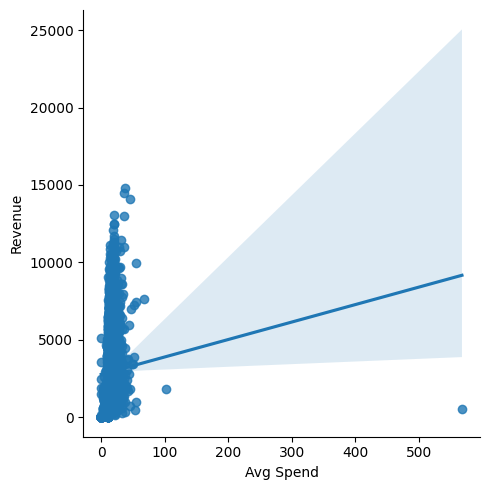

In [43]:
sns.lmplot(x="Avg Spend", y="Revenue", data=data)

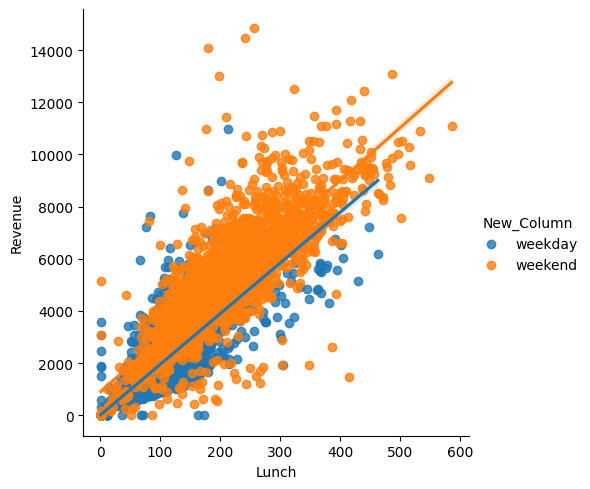

In [44]:
sns.lmplot(x="Lunch", y="Revenue", hue="New_Column", data=data)

### Correlation Matrix (numerical data) --> relationships

IMP! Use numerical cols only!

<Axes: >

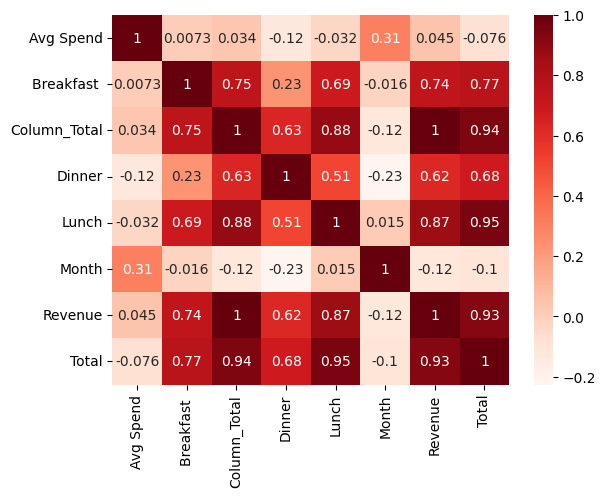

In [45]:
numdata = data.select_dtypes(include='number')
corr = numdata.corr()
sns.heatmap(corr, cmap="Reds", annot=True)

### Line Plot (time series data) --> evolution

IMP! Set DATE to be index before plotting!

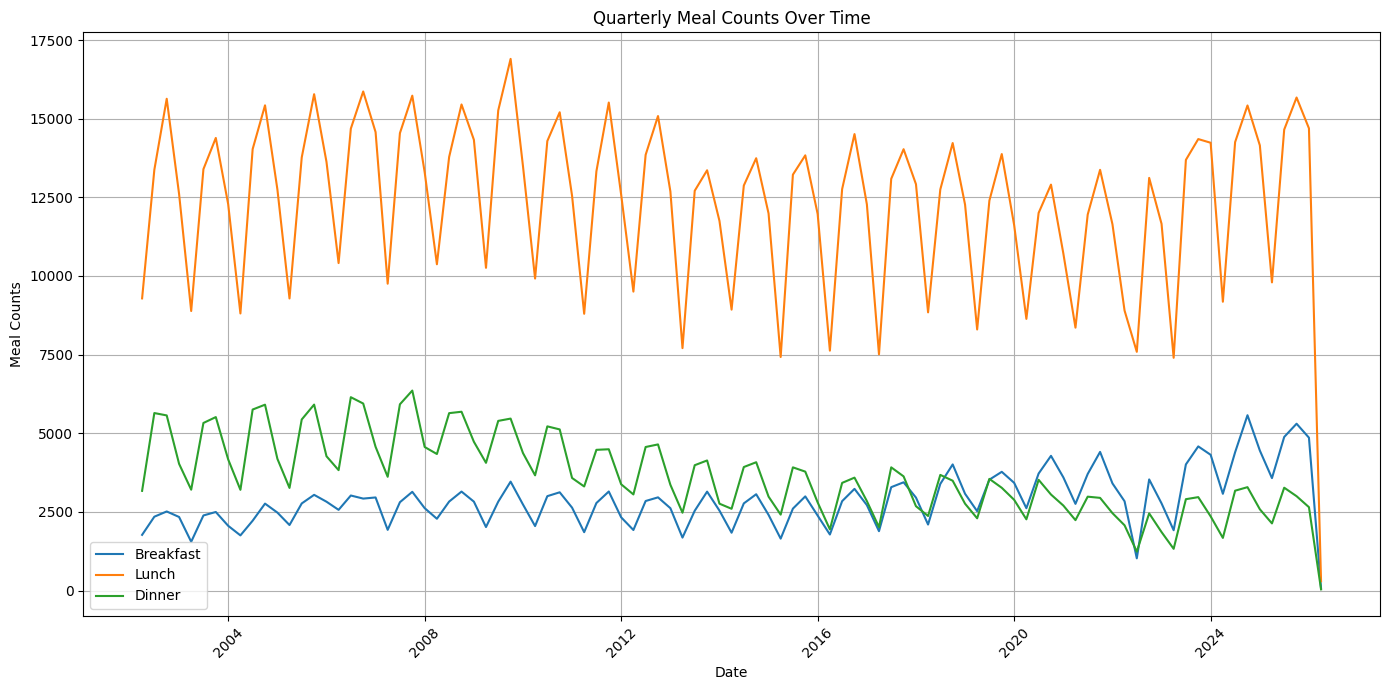

In [46]:
#data = data.set_index('Date')
quarterly_meals = data[['Breakfast ', 'Lunch', 'Dinner']].resample('QE').sum()

plt.figure(figsize=(14, 7))
plt.plot(quarterly_meals.index, quarterly_meals['Breakfast '], label='Breakfast')
plt.plot(quarterly_meals.index, quarterly_meals['Lunch'], label='Lunch')
plt.plot(quarterly_meals.index, quarterly_meals['Dinner'], label='Dinner')
plt.title('Quarterly Meal Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Meal Counts')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

### Histogram (distribution)

#### Probability Density Function (PDF)

In [47]:
data

,Avg Spend,Breakfast,Column_Total,Day,Dinner,Lunch,Month,New_Column,Notes,Revenue,Time,Total,Weather
Date,,,,,,,,,,,,,
2026-01-02,18.293582,26,4112.303582,Thursday,22,155,12,weekday,0,3677.01,00:00:00,202,PM Rain
2026-01-01,16.696031,43,3658.726031,Wednesday,14,139,12,weekday,0,3239.03,00:00:00,195,PM Rain
2025-12-31,18.163988,28,3521.533988,Tuesday,1,146,12,weekday,0,3142.37,00:00:00,174,Overcast
2025-12-30,10.000000,10,25.000000,Monday,11,11,22,weekday,Christmas,10.00,00:00:00,11,0
2025-12-29,17.293772,62,2231.783772,Sunday,1,53,12,weekend,Christmas Eves,1971.49,00:00:00,115,PM Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-01-10,9.567174,8,1609.837174,Wednesday,21,111,1,weekday,0,1320.27,00:00:00,139,0
2002-01-09,11.112474,5,1287.022474,Tuesday,1,93,1,weekday,0,1077.91,00:00:00,98,0
2002-01-08,20.244390,13,1028.284390,Monday,11,90,11,weekday,Warm,850.04,00:00:00,93,Part Sunny


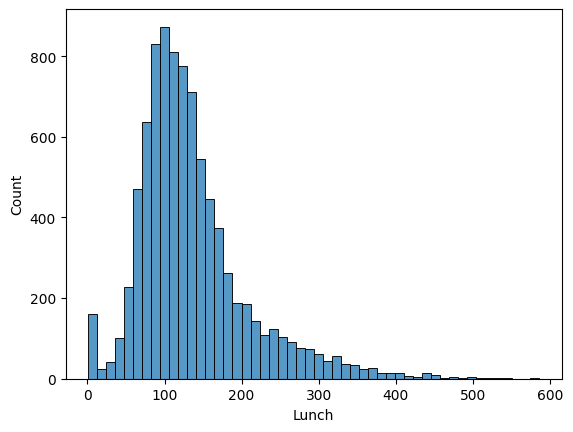

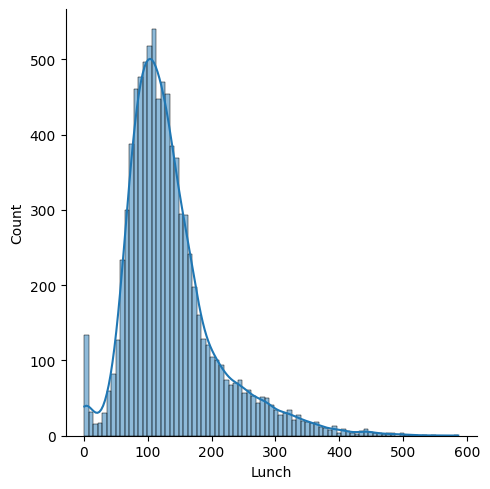

In [48]:
sns.histplot(data['Lunch'], bins=50) # Change 'bins' / Add 'binwidth'
sns.displot(data['Lunch'], kde=True) # To see kernel density estimate along with the histogram
plt.show()

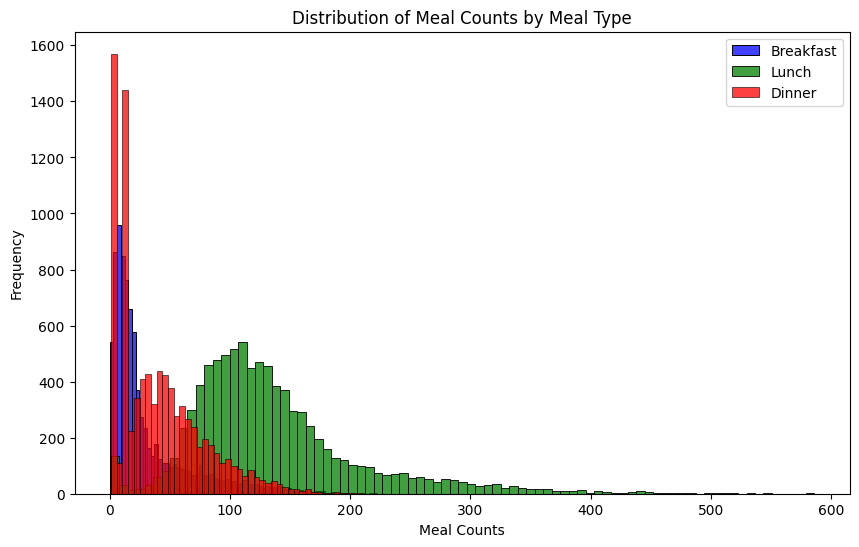

In [49]:
meal_data = data[['Breakfast ', 'Lunch', 'Dinner']]

plt.figure(figsize=(10, 6))
sns.histplot(meal_data['Breakfast '], color='blue', label='Breakfast', kde=False, stat='count')
sns.histplot(meal_data['Lunch'], color='green', label='Lunch', kde=False, stat='count')
sns.histplot(meal_data['Dinner'], color='red', label='Dinner', kde=False, stat='count')

plt.xlabel('Meal Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Meal Counts by Meal Type')
plt.legend() 
plt.show()

#### Cumulative Density Function (CDF)

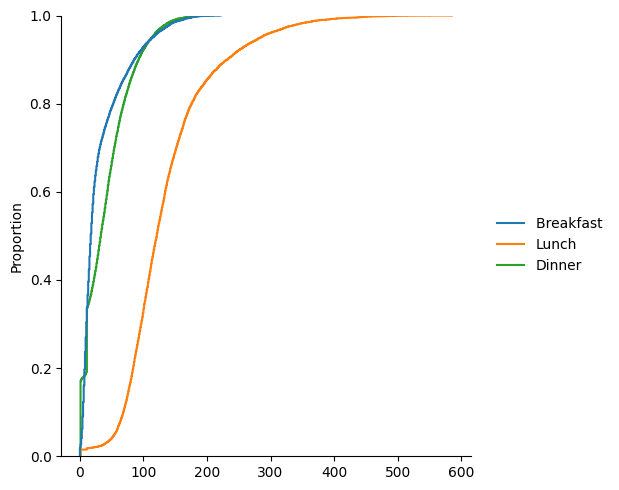

In [50]:
sns.displot(meal_data, kind='ecdf') # Empirical CDF

### Pie Plot (categorical data) --> proportions

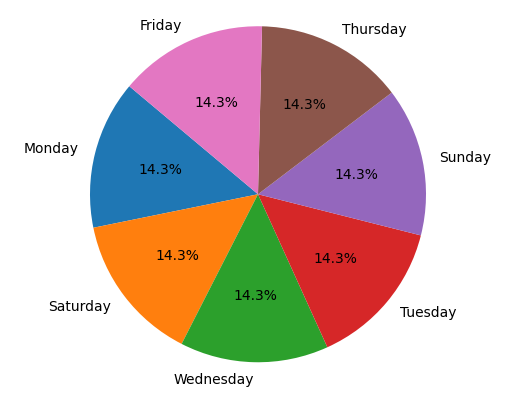

In [51]:
day_counts = data['Day'].value_counts()
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Scatterplot --> relationships

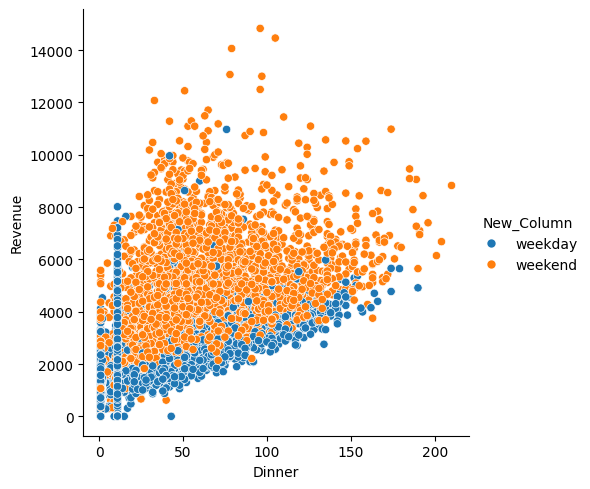

In [52]:
sns.relplot(data=data, x="Dinner", y="Revenue", hue="New_Column")

## Statistical Analysis

In [53]:
data.describe()

,Avg Spend,Breakfast,Column_Total,Dinner,Lunch,Month,Revenue,Total
count,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000
mean,15.786051,31.930291,3375.061714,40.305077,136.040844,7.952539,2947.203672,204.427382
std,7.780780,35.951636,2171.957791,36.509398,71.949149,4.915584,1938.560625,122.649589
min,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,12.951172,9.000000,1801.339589,11.000000,90.000000,4.000000,1544.590000,117.000000
50%,14.817941,17.000000,2838.977189,33.000000,121.000000,8.000000,2465.490000,173.000000
75%,17.434520,41.000000,4431.718440,61.000000,163.000000,11.000000,3870.600000,261.000000
max,568.090000,222.000000,15680.481247,210.000000,586.000000,22.000000,14833.490000,822.000000


### Descriptive Statistics

**Descriptive statistics** state facts and proven outcomes from a population, whereas **inferential statistics** analyze samples to make predictions about larger populations.

#### Measures of Central Tendency (mean, median, mode)

In [54]:
numeric_data = numeric_cols = data.select_dtypes(include='number')

mean = np.mean(numeric_data)
median = np.median(numeric_data)
mode = stats.mode(numeric_data)

#### Measures of Dispersion (variability)

*  **Range**: The difference between the maximum and minimum values in the data set.
*  **Interquartile Range (IQR)**: The difference between the 75th percentile (Q3) and the 25th percentile (Q1) in a data set, which shows the range of the middle 50% of the data.
*  **Variance**: The average of the squared differences from the Mean. It gives a measure of how the data spread around the mean.
*  **Standard Deviation**: The square root of the variance, providing a measure of spread that is in the same units as the data.

In [55]:
range_value = np.ptp(numeric_data)  # ptp stands for "peak to peak"
variance = np.var(numeric_data)
standard_deviation = np.std(numeric_data)
iqr = stats.iqr(numeric_data)  # iqr stands for "interquartile range"

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [56]:
z_scores = stats.zscore(numeric_data)
z_scores

,Avg Spend,Breakfast,Column_Total,Dinner,Lunch,Month,Revenue,Total
Date,,,,,,,,
2026-01-02,0.322291,-0.164961,0.339456,-0.501408,0.263523,0.823441,0.376490,-0.019792
2026-01-01,0.116959,0.307923,0.130611,-0.720543,0.041131,0.823441,0.150546,-0.076869
2025-12-31,0.305634,-0.109328,0.067442,-1.076636,0.138427,0.823441,0.100682,-0.248098
2025-12-30,-0.743676,-0.610029,-1.542504,-0.802718,-1.738005,2.857903,-1.515233,-1.577163
2025-12-29,0.193786,0.836441,-0.526411,-1.076636,-1.154226,0.823441,-0.503347,-0.729171
...,...,...,...,...,...,...,...,...
2002-01-10,-0.799307,-0.665663,-0.812781,-0.528800,-0.348055,-1.414468,-0.839296,-0.533480
2002-01-09,-0.600691,-0.749113,-0.961418,-1.076636,-0.598246,-1.414468,-0.964324,-0.867785
2002-01-08,0.573027,-0.526579,-1.080551,-0.802718,-0.639945,0.619995,-1.081877,-0.908554


A **z-score** (also called a standard score) gives you an idea of how far from the mean a data point is. More technically, it’s a measure of **how many standard deviations below or above the population mean a raw score is**.

### Frequency Distributions

In [57]:
Image(url='https://bernard-mlab.com/images/probability-distributions/distributions.png')

In [58]:
Image(url="https://bernard-mlab.com/images/common-distribution_huec055ab3bd48482f92384431f8f73d3e_75898_900x500_fit_box_2.png")

**1) Visual inspection**

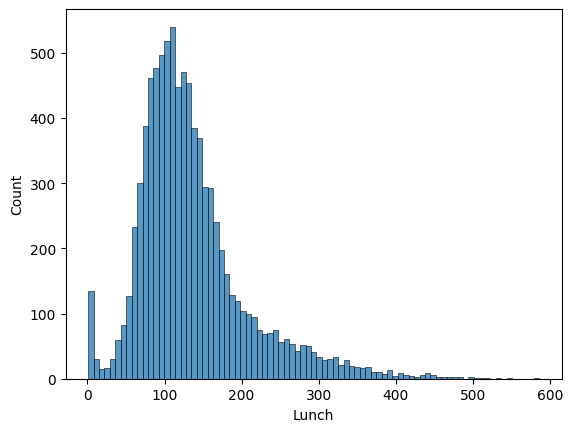

In [59]:
# Histogram
sns.histplot(data['Lunch'], kde=False)
plt.show()

**Q-Q plot** (Quantile-Quantile plot): If the points lie approximately along a line in the Q-Q plot, the data is approximately normally distributed.

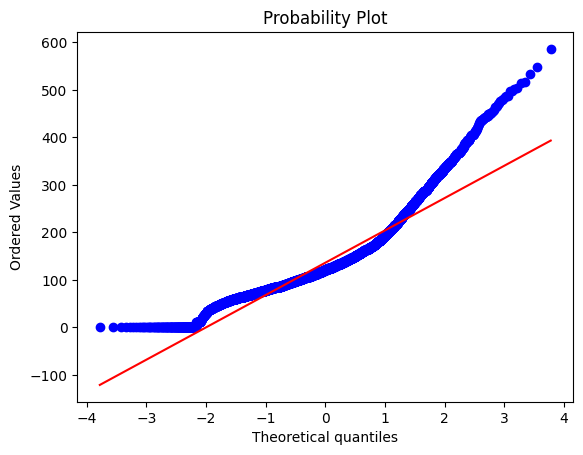

In [60]:
# Q-Q plot
stats.probplot(data['Lunch'], dist="norm", plot=plt)
plt.show()

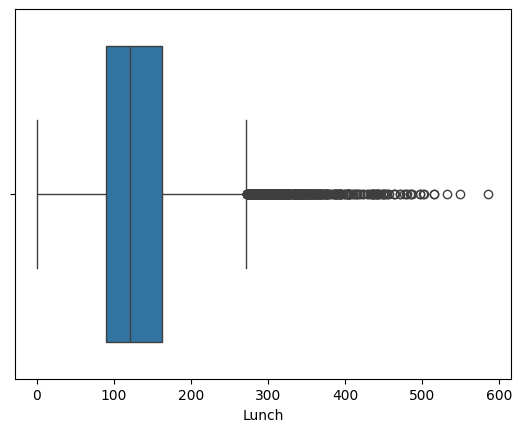

In [61]:
# Boxplot
sns.boxplot(x=data['Lunch'])
plt.show()

**2) Statistics**

*  **Skewness** measures the **asymmetry of the distribution**.
    - A positive skew (> 0) indicates that there is a tail on the right side of the distribution.
    - A negative skew (< 0) indicates that there is a tail on the left side.
    - A skewness close to zero (= 0) indicates that the data are fairly symmetrical.

*  **Kurtosis** measures the **"tailedness" of the distribution**. 
    - A positive kurtosis (> 0) indicates that the distribution has heavier tails and a sharper peak than the normal distribution (*leptokurtic*).
    - A negative kurtosis (< 0) indicates that the distribution has lighter tails and a flatter peak than the normal distribution (*platykurtic*).
    - A kurtosis (= 0) indicates a shape similar to the normal distribution (mesokurtic).

In [62]:
print(data['Lunch'].describe())
print("Skewness: ", data['Lunch'].skew())
print("Kurtosis: ", data['Lunch'].kurtosis())

count    8765.000000
mean      136.040844
std        71.949149
min         1.000000
25%        90.000000
50%       121.000000
75%       163.000000
max       586.000000
Name: Lunch, dtype: float64
Skewness:  1.4784666503580346
Kurtosis:  3.309709904399876


**3A) If distribution seems normal** --> *Anderson-Darling test* (normality test): tests the null hypothesis that the data was drawn from a normal distribution. 

In [63]:
from scipy.stats import anderson

result = anderson(data['Lunch'].dropna())
print('Statistic: %.3f' % result.statistic) # Anderson-Darling test statistic. A larger value indicates that the sample is less likely to be from a normal distribution.
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 255.768
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


**3B) If distribution does not seem normal** --> fit different distributions and evaluate with AIC/BIC metrics.

**Akaike Information Criterion (AIC)**: Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models (**the lower the value for AIC, the better the fit of the model**). It draws from information theory. When a model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

In [64]:
# Candidate distributions
distributions = [stats.lognorm, stats.weibull_min, stats.gamma] # see all at https://docs.scipy.org/doc/scipy/reference/stats.html

fit_results = {}
for distribution in distributions:
    params = distribution.fit(data['Lunch'].dropna()) # Fit distribution to data
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    log_likelihood = np.sum(distribution.logpdf(data['Lunch'].dropna(), *arg, loc=loc, scale=scale)) # Calculate the log likelihood
    aic = -2 * log_likelihood + 2 * len(params) # Calculate Akaike Information Criterion
    fit_results[distribution.name] = aic

best_fit = min(fit_results, key=fit_results.get)
print(f"The best fitting distribution is {best_fit} with AIC {fit_results[best_fit]}")

The best fitting distribution is lognorm with AIC 97679.91166426023


### Sampling/Stratification

`df.sample(n=1, frac, replace=False, weights, axis)`: extracts a random sumple according to params.
*  n: number of observations/columns to be sampled.
*  frac: proportion of observations/columns to be sampled.
*  replace: allow (replace=True) or disallow (replace=False) sampling of the same row more than once.
*  random_state: int (to set seed).
*  weights: likelihood of each row or column being included in the sample. It can be either the col name of a numeric col or a list of weights.
*  axis: sample rows (axis=0) or columns (axis=1)

**Weights are used to control class representativeness in the dataset**. Weights allows to control the sampling process based on the distribution/importance of the data, making samples more representative or focused on specific segments of the data. This technique is often used in surveys and experiments where certain observations need a higher representation in the sample due to **stratification** (dividing a population into homogeneous subgroups before sampling) or other design requirements.

In [65]:
data['Weights'] = np.random.rand(int(len(data))) #setting list of random weights (for demo purposes)
sample = data.sample(frac=0.2, random_state=3, weights='Weights') #we sample 20% of the dataset, using the weights in the column 'Lunch'

# If we directly indicate the column (e.g. weights='Lunch' 

**Stratification**

In [66]:
# Get number of classes of an attribute
len(data['Weather'].unique())

40

In [67]:
# Calculate the frequency of each class in the 'Weather' column
class_freq = data['Weather'].value_counts(normalize=True) #normalize=True for RELATIVE counts (proportions)
print(class_freq.head())

# To add this back into your DataFrame as a new column, map these percentages back to the original 'Weather' values:
#data['Weather_Percentage'] = data['Weather'].map(class_freq)

Weather
Beautiful     0.251683
0             0.157901
Sunny         0.131204
Part Sunny    0.126640
Rain          0.097775
Name: proportion, dtype: float64


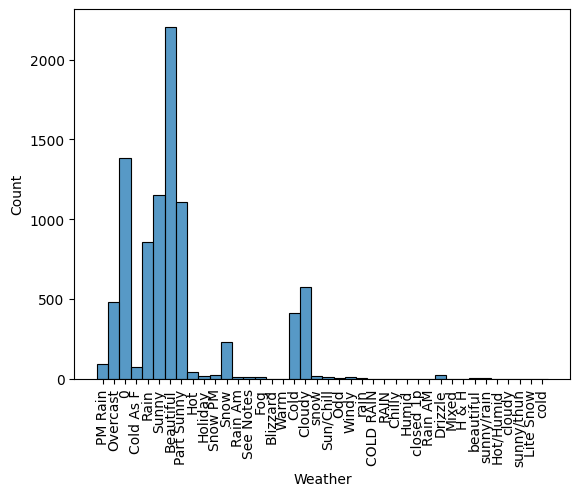

In [68]:
# Plotting the classes to observe class frequency
data['Weather'] = data['Weather'].astype(str) # column vals must be STR or BOOL in order to be plotted!

ax = sns.histplot(data['Weather'], bins=40) # Change 'bins' / Add 'binwidth' 
ax.tick_params(axis='x', rotation=90)

Stratification is most **commonly used in classification problems** because it aims to ensure that each class is appropriately represented in both the training and testing datasets. However, it can also be applied outside classification problems:
*  **Regression Problems**: we could stratify a dataset based on a continuous target variable by binning the variable into discrete categories. 
*  **Time Series Data**: when dealing with time series data that exhibits seasonality, we may want to ensure that the training and test sets both contain data from each part of the seasonal cycle. This is a form of stratification by time period (time-based splitting), rather than by class, so as to prevent the loss of stationarity with randomness. 
*  **Clustered Data**: in clustered data, where natural groupings exist, we might stratify to ensure that each group is represented in our split datasets, even if the task is not a classic classification one.
*  **Survey Sampling**: stratification can be used to ensure that various segments of a population (like age groups, income brackets, etc.) are adequately represented.

Stratification is **generally done over the target variable** in supervised learning problems (do it with `train_test_split(stratify=y)`). However, if we want to do it over a different variable, then we need a custom stratfication approach:

In [82]:
from sklearn.model_selection import train_test_split

# Direct use if already categorical
strata = data.groupby(['Day'])

# Containers for stratified splits
train_indices = []
test_indices = []

# Split data within each stratum
for group_name, group_data in strata:
    train_group, test_group = train_test_split(group_data, test_size=0.2, random_state=42)
    
    # Collect indices rather than data to avoid data leakage in joining phase
    train_indices.extend(train_group.index)
    test_indices.extend(test_group.index)

# Retrieve the stratified samples
train_data = data.loc[train_indices]
test_data = data.loc[test_indices]

# OPTIONAL: random shuffle
#np.random.seed(42)  # for reproducibility
#np.random.shuffle(train_indices)
#np.random.shuffle(test_indices)
#train_data = data.loc[train_indices]
#test_data = data.loc[test_indices]

# Check proportions in full data
print(data.groupby(['Day']).size() / len(data))

# Check proportions in train data
print(train_data.groupby(['Day']).size() / len(train_data))

# Check proportions in test data
print(test_data.groupby(['Day']).size() / len(test_data))

Day
Friday       0.142727
Monday       0.143069
Saturday     0.142955
Sunday       0.142841
Thursday     0.142727
Tuesday      0.142841
Wednesday    0.142841
dtype: float64
Day
Friday       0.142552
Monday       0.143406
Saturday     0.142979
Sunday       0.142837
Thursday     0.142694
Tuesday      0.142837
Wednesday    0.142694
dtype: float64
Day
Friday       0.142533
Monday       0.143668
Saturday     0.143101
Sunday       0.142533
Thursday     0.142533
Tuesday      0.142533
Wednesday    0.143101
dtype: float64


### Hypothesis Testing

1) State the **hypotheses**:
*  The null hypothesis (H0) represents the default statement to be tested, typically stating that there is no effect or no difference.
*  he alternative hypothesis (H1 or Ha) represents what we are trying to prove, indicating there is an effect or a difference.

2) Choose a **significance level (α)**: probability of rejecting the null hypothesis when it is actually true, typically set at 0.05 (or 5%).

3) **Collect data**: Obtain a sample from the population.
   
4) Calculate a **test statistic** (e.g., Z-score in a Z-test).
   
5) Determine the **p-value**: probability of observing a test statistic as extreme as, or more extreme than, the observed value, under the assumption that the null hypothesis is true. If the p-value is less than the chosen significance level, you reject the null hypothesis.

6) Make a **decision**:
*  If p-value ≤ α: Reject H0, there is enough evidence to support Ha.
*  If p-value > α: Do not reject H0, there is not enough evidence to support Ha.

In [69]:
# Hypotheses
# H0: μ = $150 (The average lunch cost is $150)
# Ha: μ ≠ $150 (The average lunch cost is different from $150)

# Given values
population_mean = 150
sample_mean = 160
sample_std = 30
sample_size = 50

# Calculate the standard error
standard_error = sample_std / np.sqrt(sample_size)

# Calculate the Z-score
z_score = (sample_mean - population_mean) / standard_error

# Calculate the p-value for the two-tailed test
p_value = stats.norm.sf(abs(z_score)) * 2  # The sf function gives us the survival function, which is 1-cdf

# Make a decision based on the p-value
if p_value < 0.05:
    print(f'Reject the null hypothesis. P-value: {p_value}')
else:
    print(f'Fail to reject the null hypothesis. P-value: {p_value}')

Reject the null hypothesis. P-value: 0.018422125454099002


### Principal Component Analysis (for dimensionality reduction)

**IMP!:**
*  Only NUMERICAL values can be included.
*  Data must be STANDARDIZED before applying PCA.

In PCA, each **component is a linear combination of all the input variables**. Essentially, a principal component represents a direction in feature space along which the data varies the most. The coefficients of the linear combination are known as **loadings**, and they provide information about the contribution of each variable to the component.

In [70]:
# Getting numeric data only
numeric_data = data.select_dtypes(include='number')

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

In [71]:
# Apply PCA
pca = PCA(n_components=3)  # Adjust to desired number of components
principal_components = pca.fit_transform(data_scaled)
components = pca.components_

df_pca = pd.DataFrame(data=components.T, columns=['PC1', 'PC2', 'PC3'], index=numeric_data.columns)
explained_variance = pca.explained_variance_ratio_ 
cumulative_variance = explained_variance.cumsum()

print("Explained variance by each PC:", explained_variance)
print("Loadings:")
df_pca

Explained variance by each PC: [0.5358337  0.15210216 0.11105385]
Loadings:


,PC1,PC2,PC3
Avg Spend,-0.017271,0.656286,0.025615
Breakfast,0.357027,0.160858,-0.013904
Column_Total,0.446121,0.042896,-0.003692
Dinner,0.308088,-0.265974,0.004787
Lunch,0.420132,0.093909,0.007308
Month,-0.059020,0.676634,0.040615
Revenue,0.442123,0.048966,-0.003953
Total,0.450306,-0.009262,-0.000685
Weights,0.006971,-0.041177,0.998697


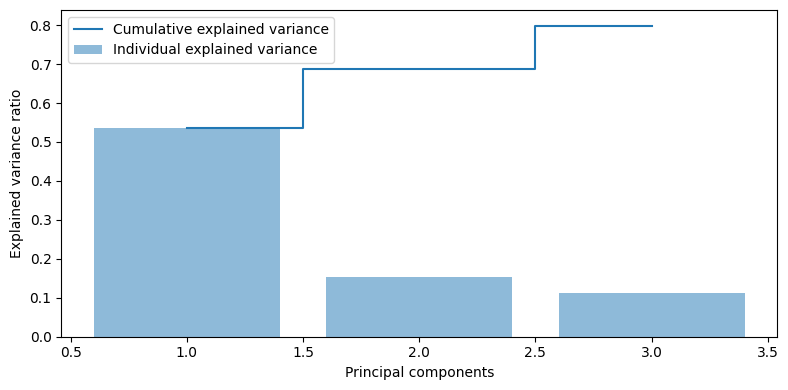

In [72]:
# Plotting the explained and cumulative variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Dimensionality Reduction**

To reduce the dimensionality of our dataset, we will **transform** it by projecting it onto the selected principal components. But careful! This transformed dataset **no longer contains the original features**, but rather the projections of your data points onto the directions of maximum variance in the original feature space.

In [73]:
# The data_reduced now contains the dataset with reduced dimensionality
df_reduced = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(3)])
df_reduced

,PC1,PC2,PC3
0,0.154622,0.918868,0.394135
1,-0.054983,0.891490,0.056179
2,-0.399398,1.024995,0.635986
3,-3.426644,1.314907,-0.936658
4,-1.358667,0.974054,-0.410910
...,...,...,...
8760,-1.420554,-1.568707,0.343317
8761,-1.991738,-1.386591,1.501414
8762,-2.115511,0.745869,0.714513
8763,0.263513,-1.342314,0.182971


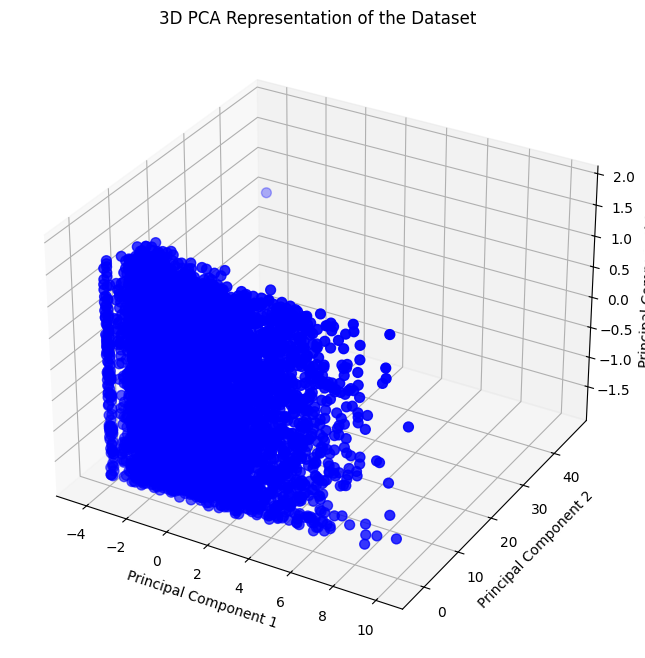

In [74]:
# 3D Visualization: Scatter plot of all the points in the PCA-reduced dataset
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c='blue', s=50)

ax.set_title('3D PCA Representation of the Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()